In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [18]:
computers = pd.read_csv('Course Materials/Data/Computers.csv')

In [19]:
computers.head()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499,25,80,4,14,no,no,yes,94,1
1,1795,33,85,2,14,no,no,yes,94,1
2,1595,25,170,4,15,no,no,yes,94,1
3,1849,25,170,8,14,no,no,no,94,1
4,3295,33,340,16,14,no,no,yes,94,1


<Axes: xlabel='price', ylabel='Count'>

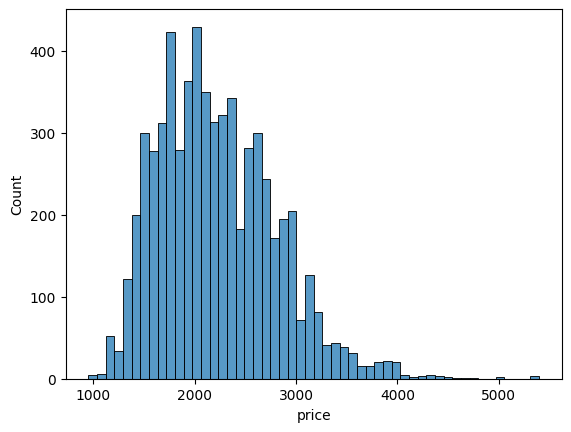

In [27]:
sns.histplot(computers['price'])

(0.0, 33.5)

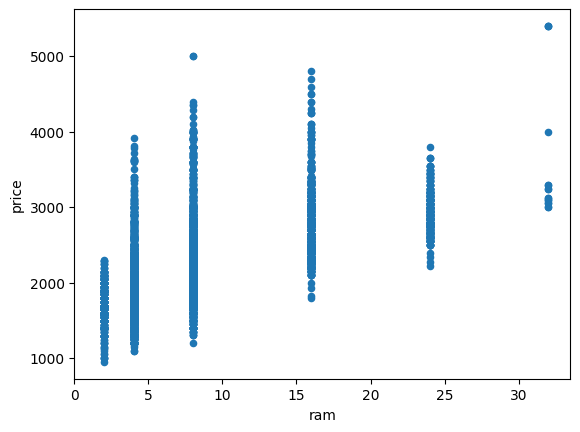

In [28]:
computers.plot.scatter(x='ram',y='price').set_xlim(0)

In [20]:
computers.corr(numeric_only=True)

,price,speed,hd,ram,screen,ads,trend
price,1.000000,0.300976,0.430258,0.622748,0.296041,0.054540,-0.199987
speed,0.300976,1.000000,0.372304,0.234760,0.189074,-0.215232,0.405438
hd,0.430258,0.372304,1.000000,0.777726,0.232802,-0.323222,0.577790
ram,0.622748,0.234760,0.777726,1.000000,0.208954,-0.181670,0.276844
screen,0.296041,0.189074,0.232802,0.208954,1.000000,-0.093919,0.188614
ads,0.054540,-0.215232,-0.323222,-0.181670,-0.093919,1.000000,-0.318553
trend,-0.199987,0.405438,0.577790,0.276844,0.188614,-0.318553,1.000000


<Axes: >

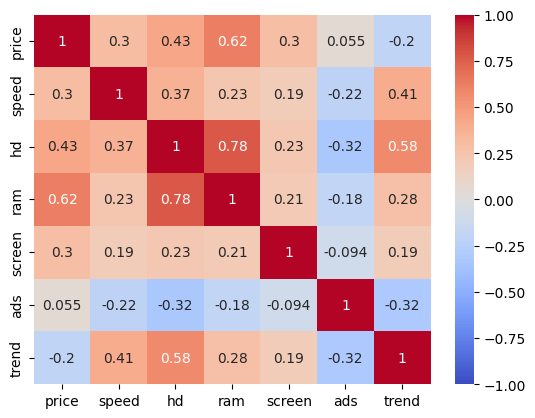

In [21]:
sns.heatmap(computers.corr(numeric_only=True), annot=True, vmax=1, vmin=-1, cmap='coolwarm')

In [29]:
X = sm.add_constant(computers['ram'])
y = computers['price']

In [30]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     3964.
Date:                Fri, 13 Dec 2024   Prob (F-statistic):               0.00
Time:                        07:40:33   Log-Likelihood:                -47180.
No. Observations:                6259   AIC:                         9.436e+04
Df Residuals:                    6257   BIC:                         9.438e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1687.2925     10.221    165.073      0.000    1667.255    1707.330
ram           64.2316      1.020     62.959      0.000      62.232      66.232
==============================================================================
Omnibus:                     1327.783   Durbin-Watson:                   1.533
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3113.140
Skew:                           1.188   Prob(JB):                         0.00
Kurtosis:                       5.508   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

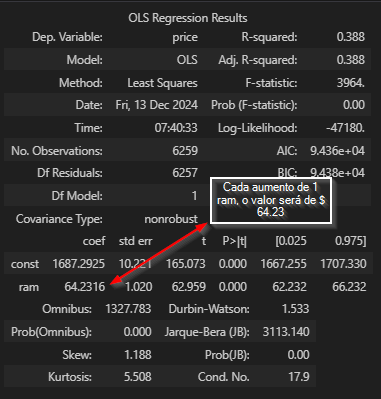

<Axes: ylabel='None'>

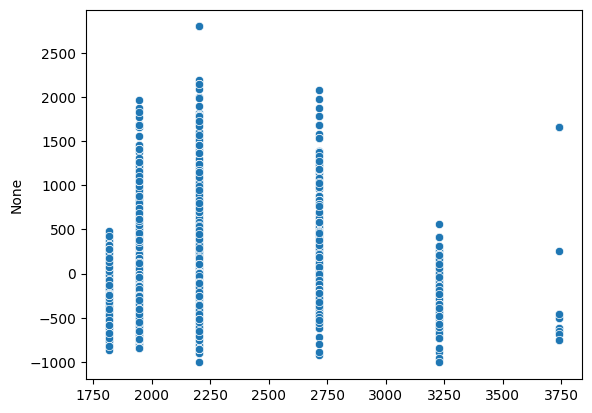

In [32]:
sns.scatterplot(x=model.predict(), y=model.resid)

In [34]:
feature_values = [0,2.4,8,16,32]

predict_df = sm.add_constant(pd.DataFrame({'ram':feature_values}))
predict_df

,const,ram
0,1.0,0.0
1,1.0,2.4
2,1.0,8.0
3,1.0,16.0
4,1.0,32.0


In [36]:
predictions = model.predict(predict_df)
predictions.index = feature_values
predictions

0.0     1687.292537
2.4     1841.448441
8.0     2201.145550
16.0    2714.998564
32.0    3742.704591
dtype: float64